In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Importing Data with Features 
data_hedonic = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final_Cleaned.csv')
data_utilitarian = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final_Cleaned.csv')

In [3]:
# Combining data in one dataframe
data= pd.concat([data_hedonic, data_utilitarian])

# Mapping Product Type from 0 and 1 to String Values, 0 = Utilitarian, 1 = Hedonic
data['Product Type'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})
print(data['Product Type'].value_counts())

# Filtering for helpful reviews only
data_helpful = data[data['helpful_vote'] != 0]


Product Type
Hedonic        18456
Utilitarian    18154
Name: count, dtype: int64


In [4]:
# Create 'Helpful_Code' column based on 'helpful_vote'
data_utilitarian['Helpful_Code'] = (data_utilitarian['helpful_vote'] > 0).astype(int)
data_hedonic['Helpful_Code'] = (data_hedonic['helpful_vote'] > 0).astype(int)

data['Helpful_Code'] = (data['helpful_vote'] > 0).astype(int)

# 1. Methods for analysis

In [5]:
# Function Building for analyzing the helpful Review by product type
def plot_votes_by_product_type(data):
    # Get unique product types
    product_types = data['Prod'].unique()

    # Initialize lists to store counts of helpful and unhelpful reviews for each product type
    not_helpful_votes_counts = []
    helpful_votes_counts = []

    # Calculate counts for each product type
    for product_type in product_types:
        # Count of rows where Helpful Review < 0 for the current product type
        not_helpful_votes_count = data[(data['Prod'] == product_type) & (data['Helpful_Code'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)

        # Count of rows where Helpful Review are > 0 for the current product type
        helpful_votes_count = data[(data['Prod'] == product_type) & (data['Helpful_Code'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)

    # Plotting the data
    plot_data = pd.DataFrame({
        'Prod': product_types,
        'Unhelpful Review': not_helpful_votes_counts,
        'Helpful Review': helpful_votes_counts
    })

    plot_data = plot_data.melt(id_vars='Prod', var_name='Vote Type', value_name='Count')
    plt.figure(figsize=(12, 6), dpi=800)
    ax = sns.barplot(x='Prod', y='Count', hue='Vote Type', data=plot_data,edgecolor="black", palette={'Unhelpful Review': sns.xkcd_rgb['amber'], 'Helpful Review': sns.xkcd_rgb['faded green']})

    for i in ax.containers:
         ax.bar_label(i,)

    plt.xlabel('Product')
    plt.ylabel('Count')
    plt.title('Distribution of helpful reviews across product categories')
    plt.legend(title='Vote Type')
    plt.show()

In [6]:
#Function for calculating the review counts by product type/Helpful Review 
def calculate_review_counts(data, category_column='Prod'):
    # Get unique categories
    categories = data[category_column].unique()

    # Initialize lists to store counts and categories
    categories_list = []
    not_helpful_votes_counts = []
    helpful_votes_counts = []
    total_reviews_counts = []

    # Calculate counts for each category
    for category in categories:
        # Check if the category exists in the DataFrame
        if category not in data[category_column].values:
            print(f"Category '{category}' not found in the DataFrame.")
            continue
        
        # Count of rows where Helpful Review are zero for the current category
        not_helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)
        
        # Count of rows where Helpful Review are greater than zero for the current category
        helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)
        
        # Append category to the list for DataFrame creation
        categories_list.append(category)

        # Total number of reviews for the current category
        total_reviews_count = not_helpful_votes_count + helpful_votes_count
        total_reviews_counts.append(total_reviews_count)

    # Calculate percentage of Helpful Review
    total_votes_counts = [not_h + h for not_h, h in zip(not_helpful_votes_counts, helpful_votes_counts)]
    helpful_vote_percentages = [(h / total) * 100 if total != 0 else 0 for h, total in zip(helpful_votes_counts, total_votes_counts)]

    # Calculate percentage of Unhelpful Review
    unhelpful_vote_percentages = [(not_h / total) * 100 if total != 0 else 0 for not_h, total in zip(not_helpful_votes_counts, total_reviews_counts)]
    
    # Create DataFrame to store results
    counts_df = pd.DataFrame({
        category_column.capitalize(): categories_list,
        'Unhelpful Reviews': not_helpful_votes_counts,
        'Helpful Reviews': helpful_votes_counts,
        'Total Reviews': total_reviews_counts,
        'Helpful Review Ratio': helpful_vote_percentages,
        'Unhelpful Review Ratio': unhelpful_vote_percentages
    })

    # Return the DataFrame
    return(counts_df)


# 2. Helpfulness Analysis

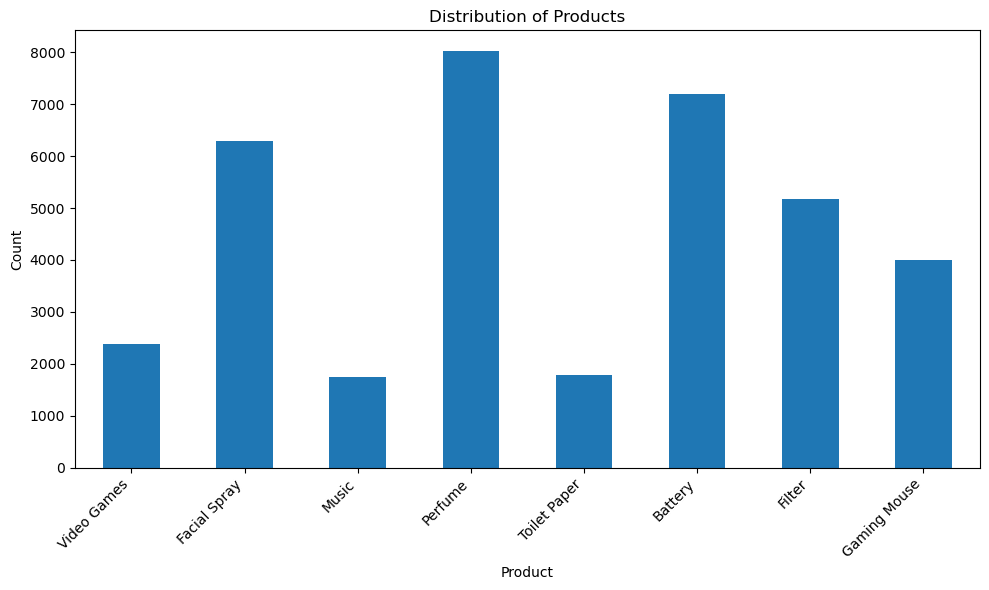

In [7]:
# Get overview about product distribution within the data

# Get the unique products
unique_products = data['Prod'].unique()

# Count the number of reviews for each product and plot the distribution
product_counts = data['Prod'].value_counts().reindex(unique_products, fill_value=0)
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Distribution of Products')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

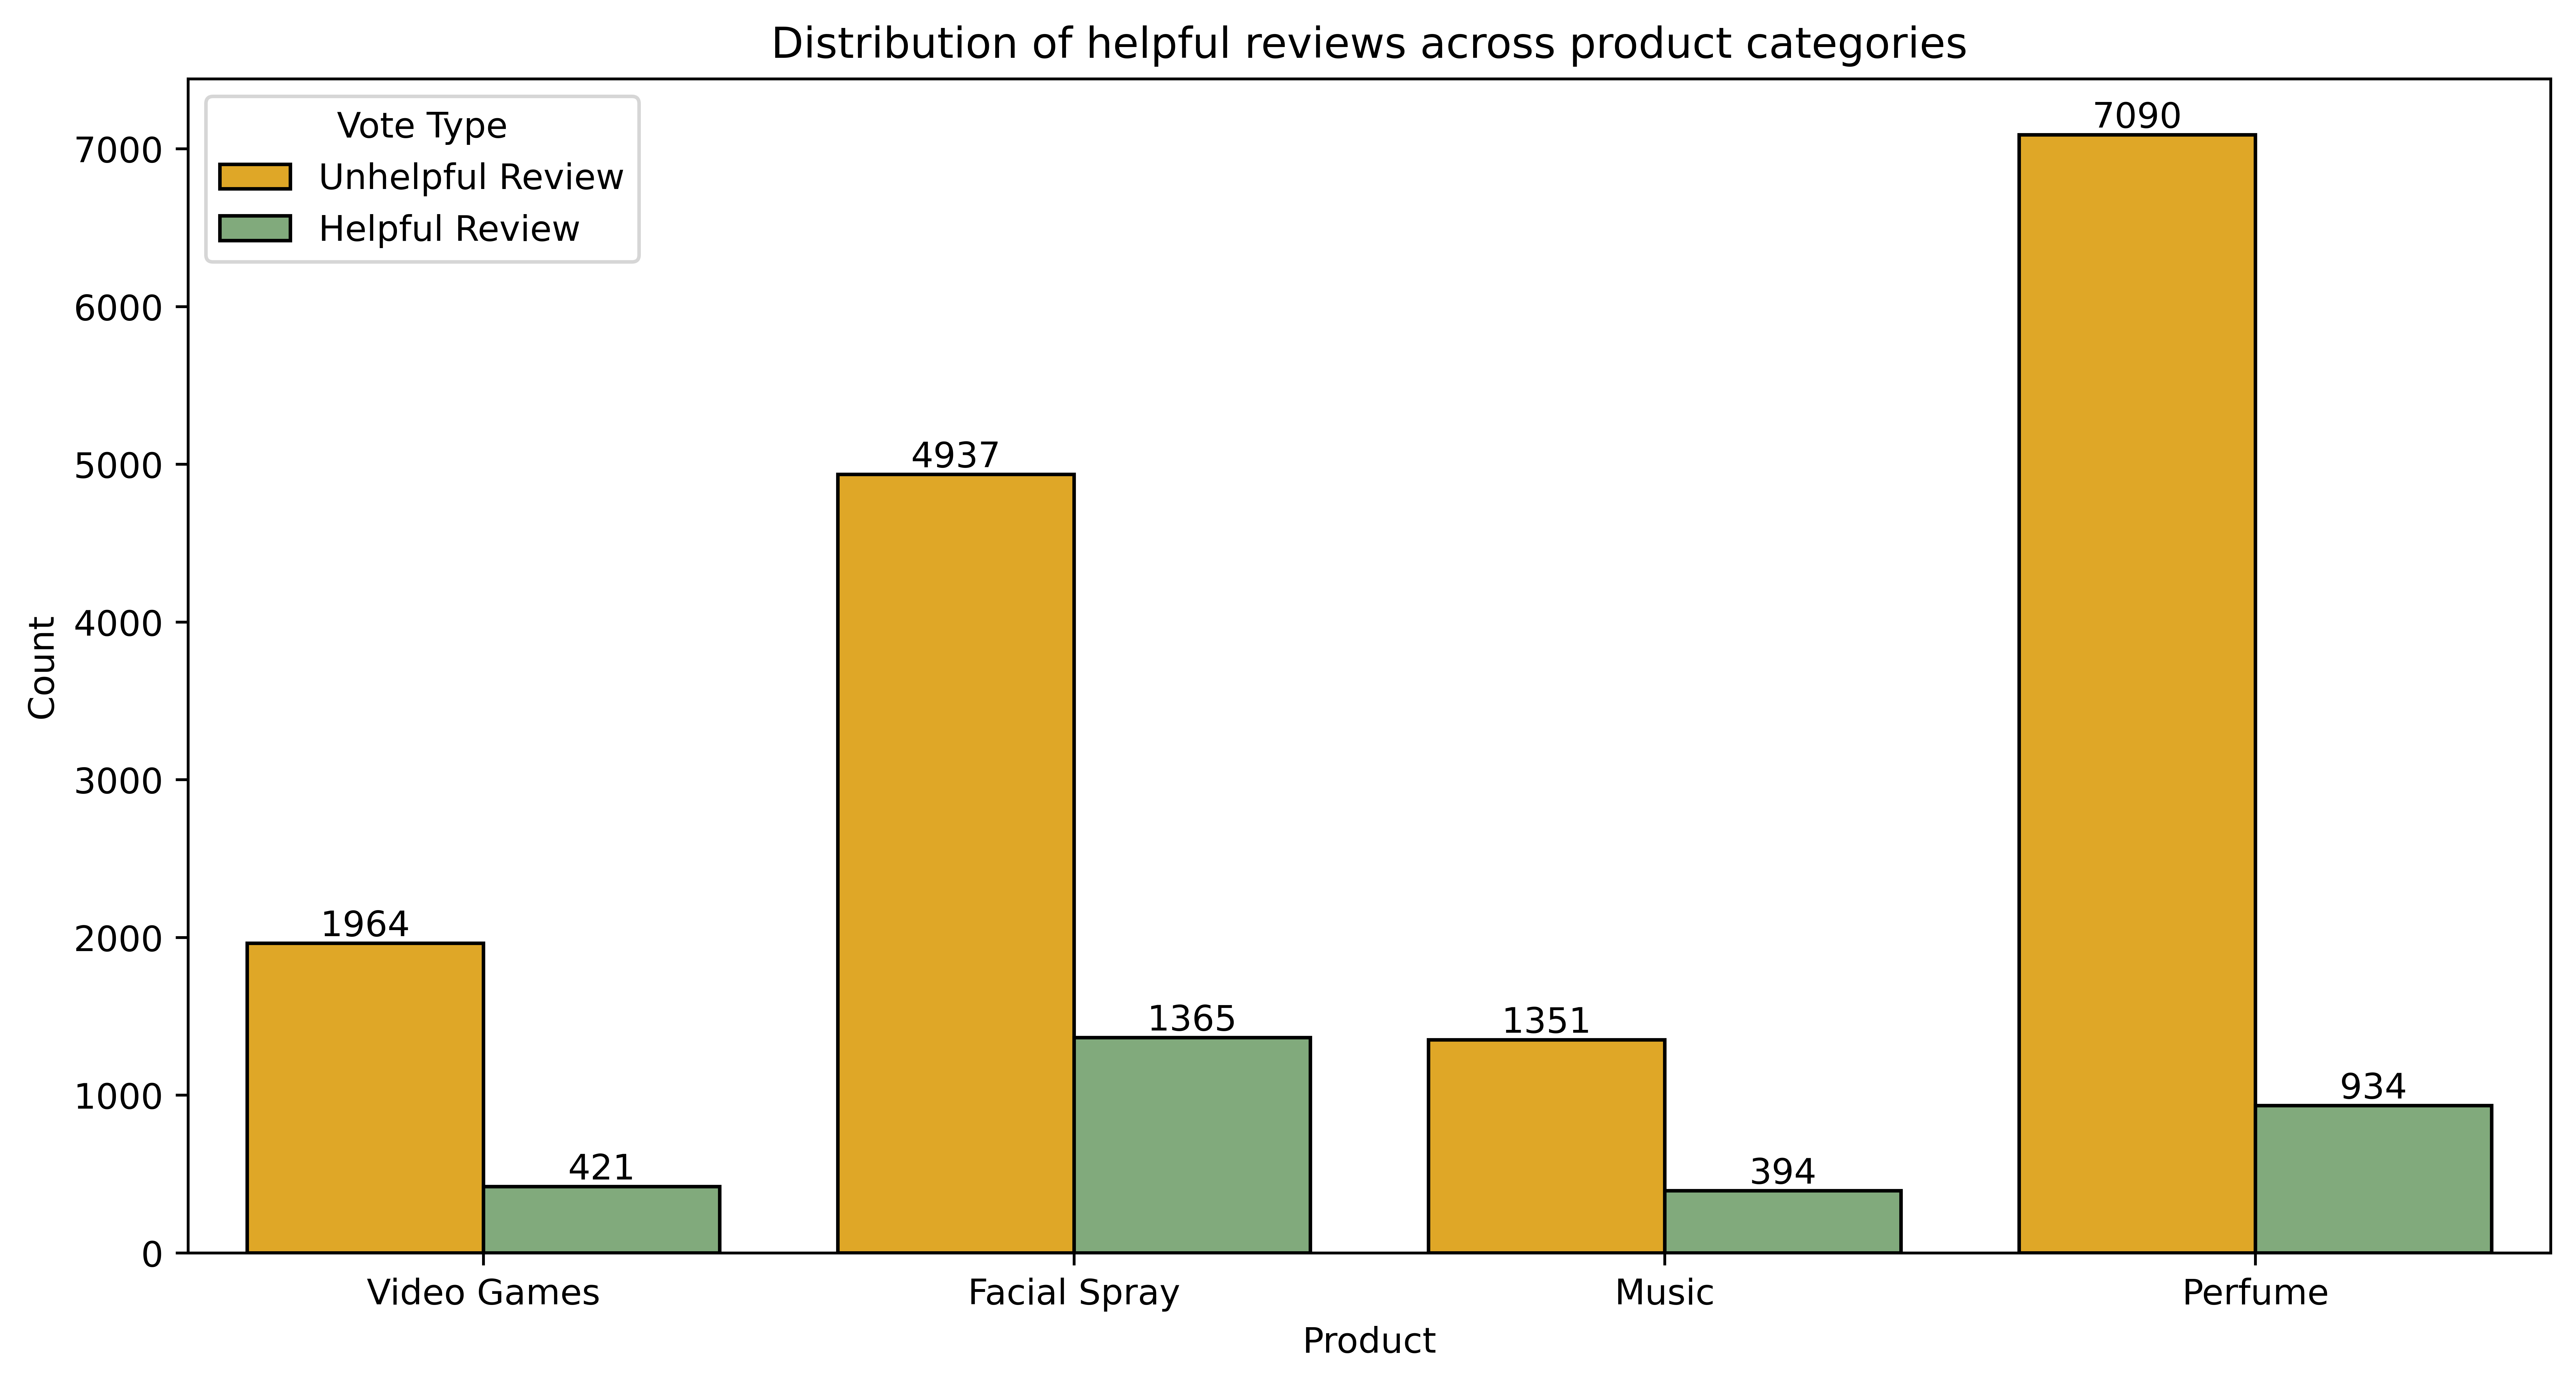

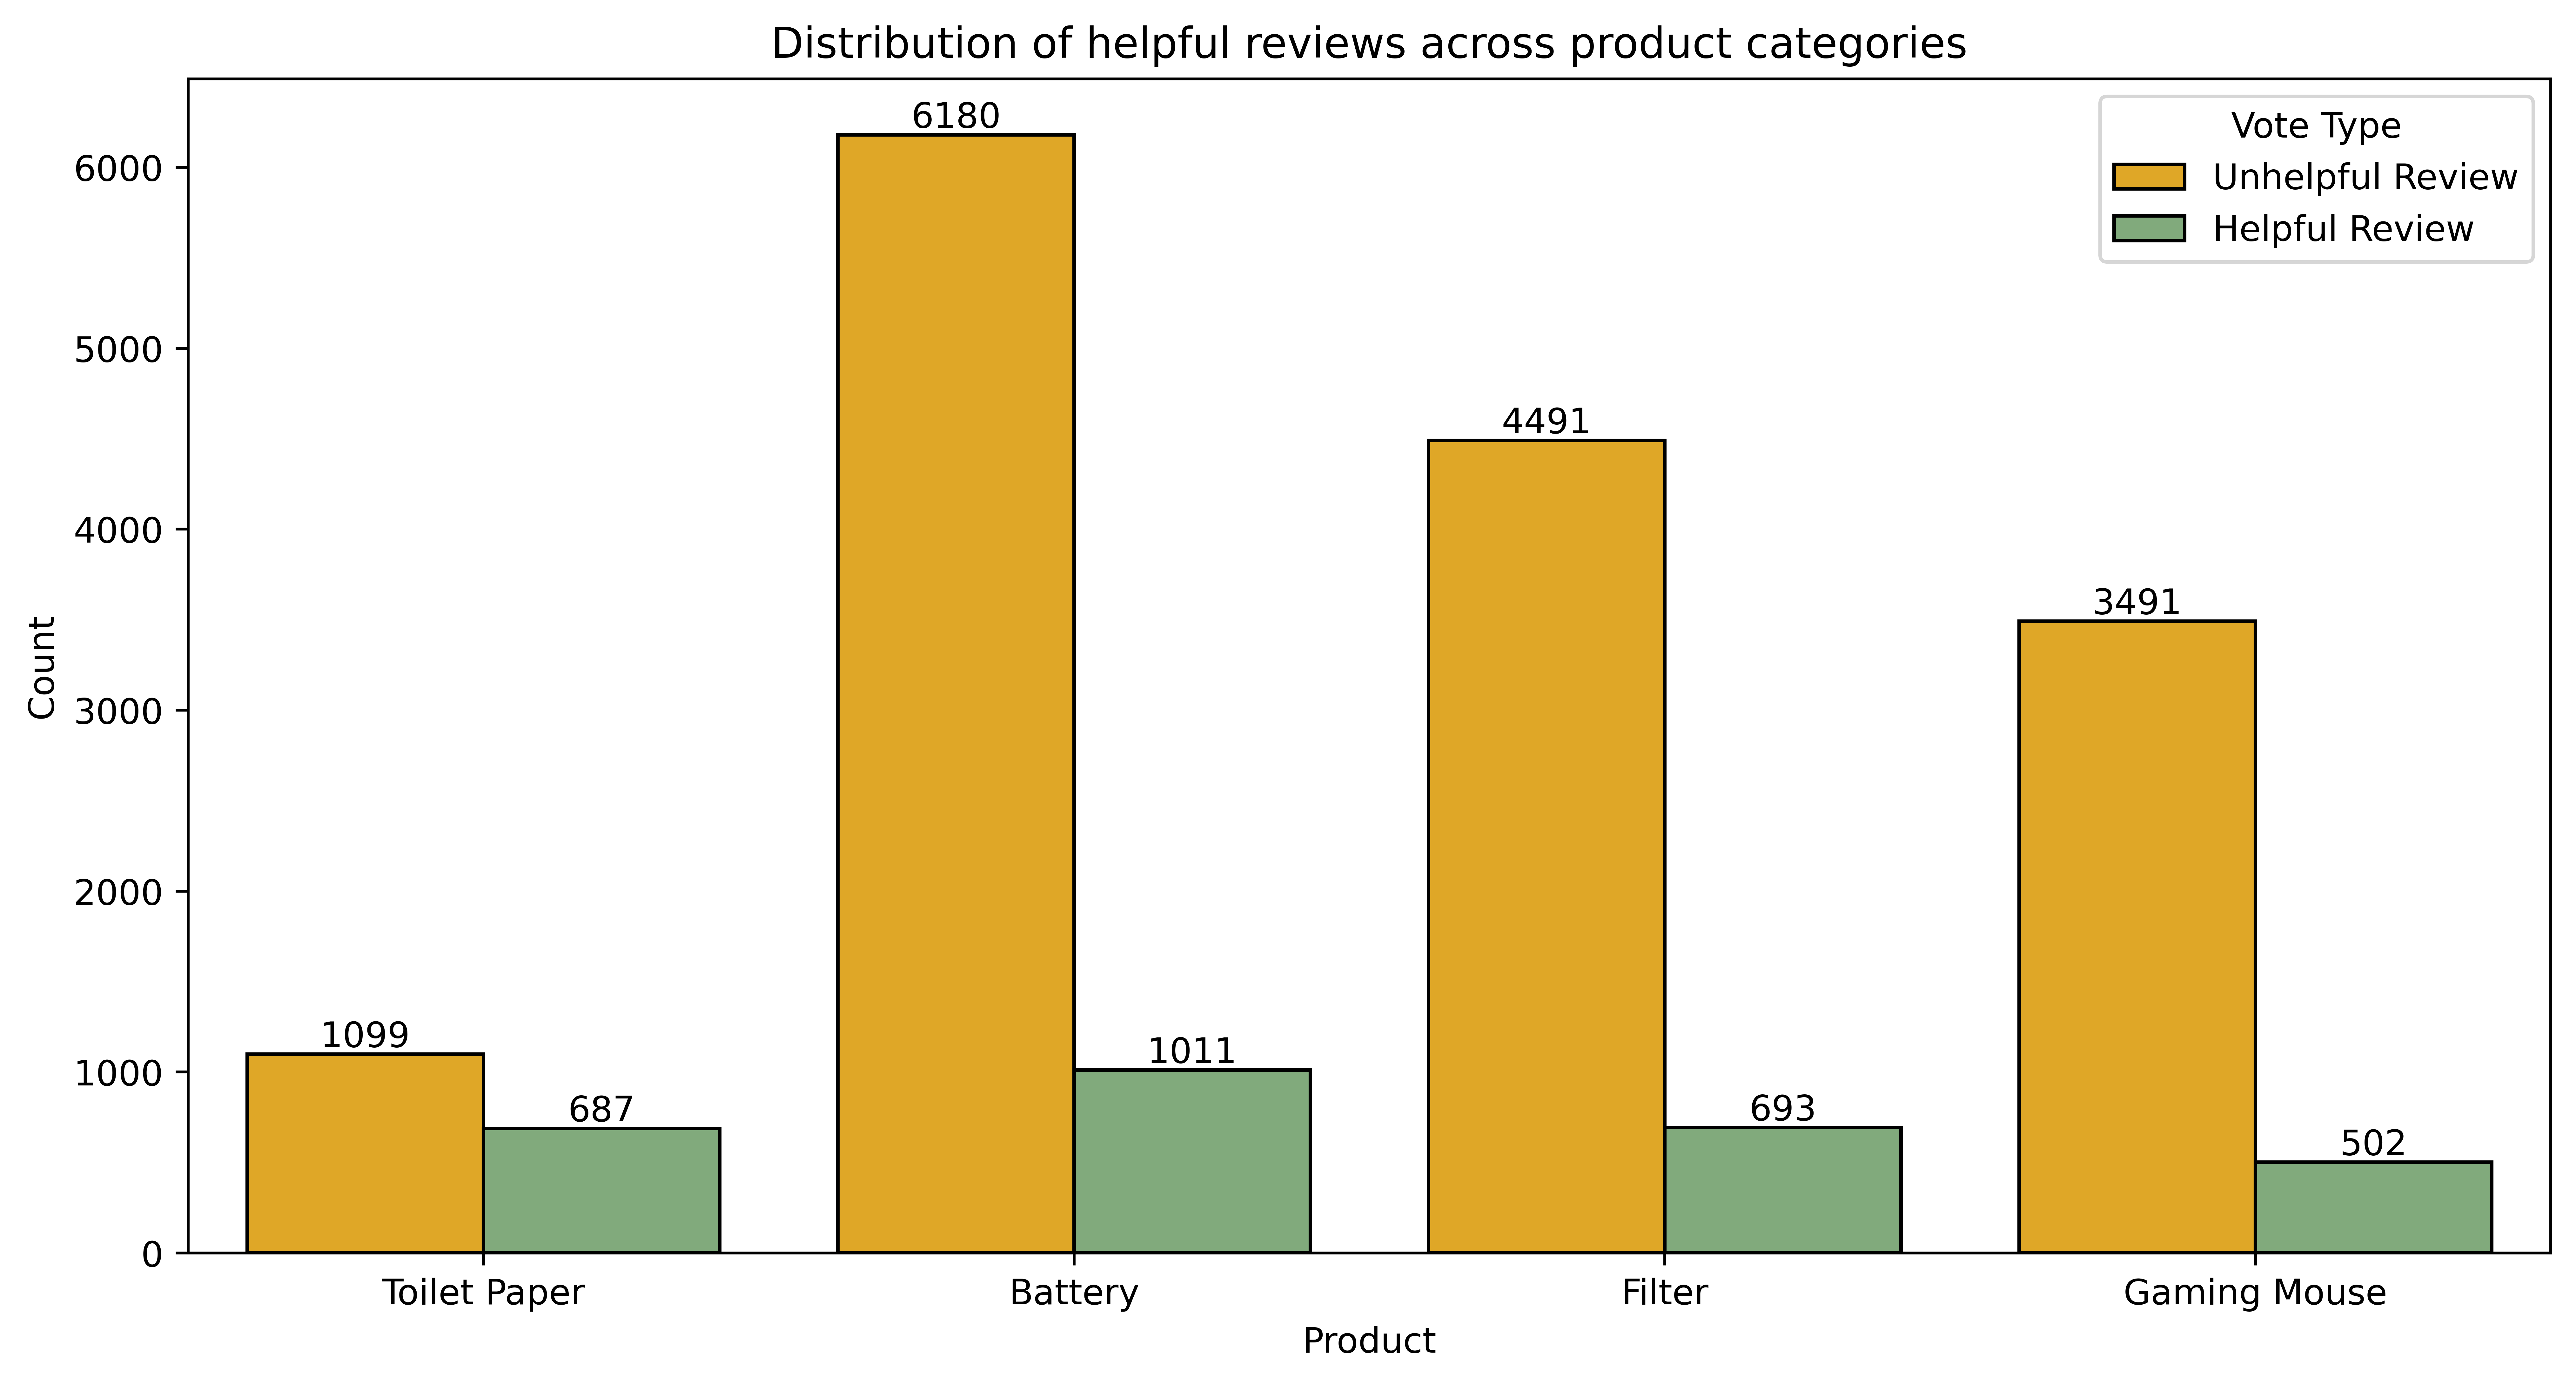

In [8]:
# Showing the distribution of helpful/unhelpful reviews across product categories : Hedonic and Utilitarian

plot_votes_by_product_type (data_hedonic)
plot_votes_by_product_type (data_utilitarian)


## 2.1 Statistic for Helpfulness Analysis 
In the following different methods for statistical evaluation of the helpful votes are conducted. 

In [9]:
# Descriptive Helpfulness Analysis for Data grouped by product 
review_counts_hed_prod = calculate_review_counts (data, 'Prod')
print(review_counts_hed_prod)

#Saving to CSV
review_counts_hed_prod.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/DataTotal_Review_Counts_Prod.csv', index=False)

           Prod  Unhelpful Reviews  Helpful Reviews  Total Reviews  \
0   Video Games               1964              421           2385   
1  Facial Spray               4937             1365           6302   
2         Music               1351              394           1745   
3       Perfume               7090              934           8024   
4  Toilet Paper               1099              687           1786   
5       Battery               6180             1011           7191   
6        Filter               4491              693           5184   
7  Gaming Mouse               3491              502           3993   

   Helpful Review Ratio  Unhelpful Review Ratio  
0             17.651992               82.348008  
1             21.659791               78.340209  
2             22.578797               77.421203  
3             11.640080               88.359920  
4             38.465845               61.534155  
5             14.059241               85.940759  
6             13.36

In [10]:
# Helpfulness Analysis for Utilitarian Data after Main Category
review_counts_Cat = calculate_review_counts (data, 'main_category')

# print 
print (review_counts_Cat)

#  Saving to csv
review_counts_Cat.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Review_Counts_Cat.csv')

  Main_category  Unhelpful Reviews  Helpful Reviews  Total Reviews  \
0   Video Games               1964              421           2385   
1        Beauty              12027             2299          14326   
2         Music               1351              394           1745   
3     Household               1099              687           1786   
4   Electronics               9671             1513          11184   
5    Appliances               4491              693           5184   

   Helpful Review Ratio  Unhelpful Review Ratio  
0             17.651992               82.348008  
1             16.047745               83.952255  
2             22.578797               77.421203  
3             38.465845               61.534155  
4             13.528255               86.471745  
5             13.368056               86.631944  


## 2.2 Visualization

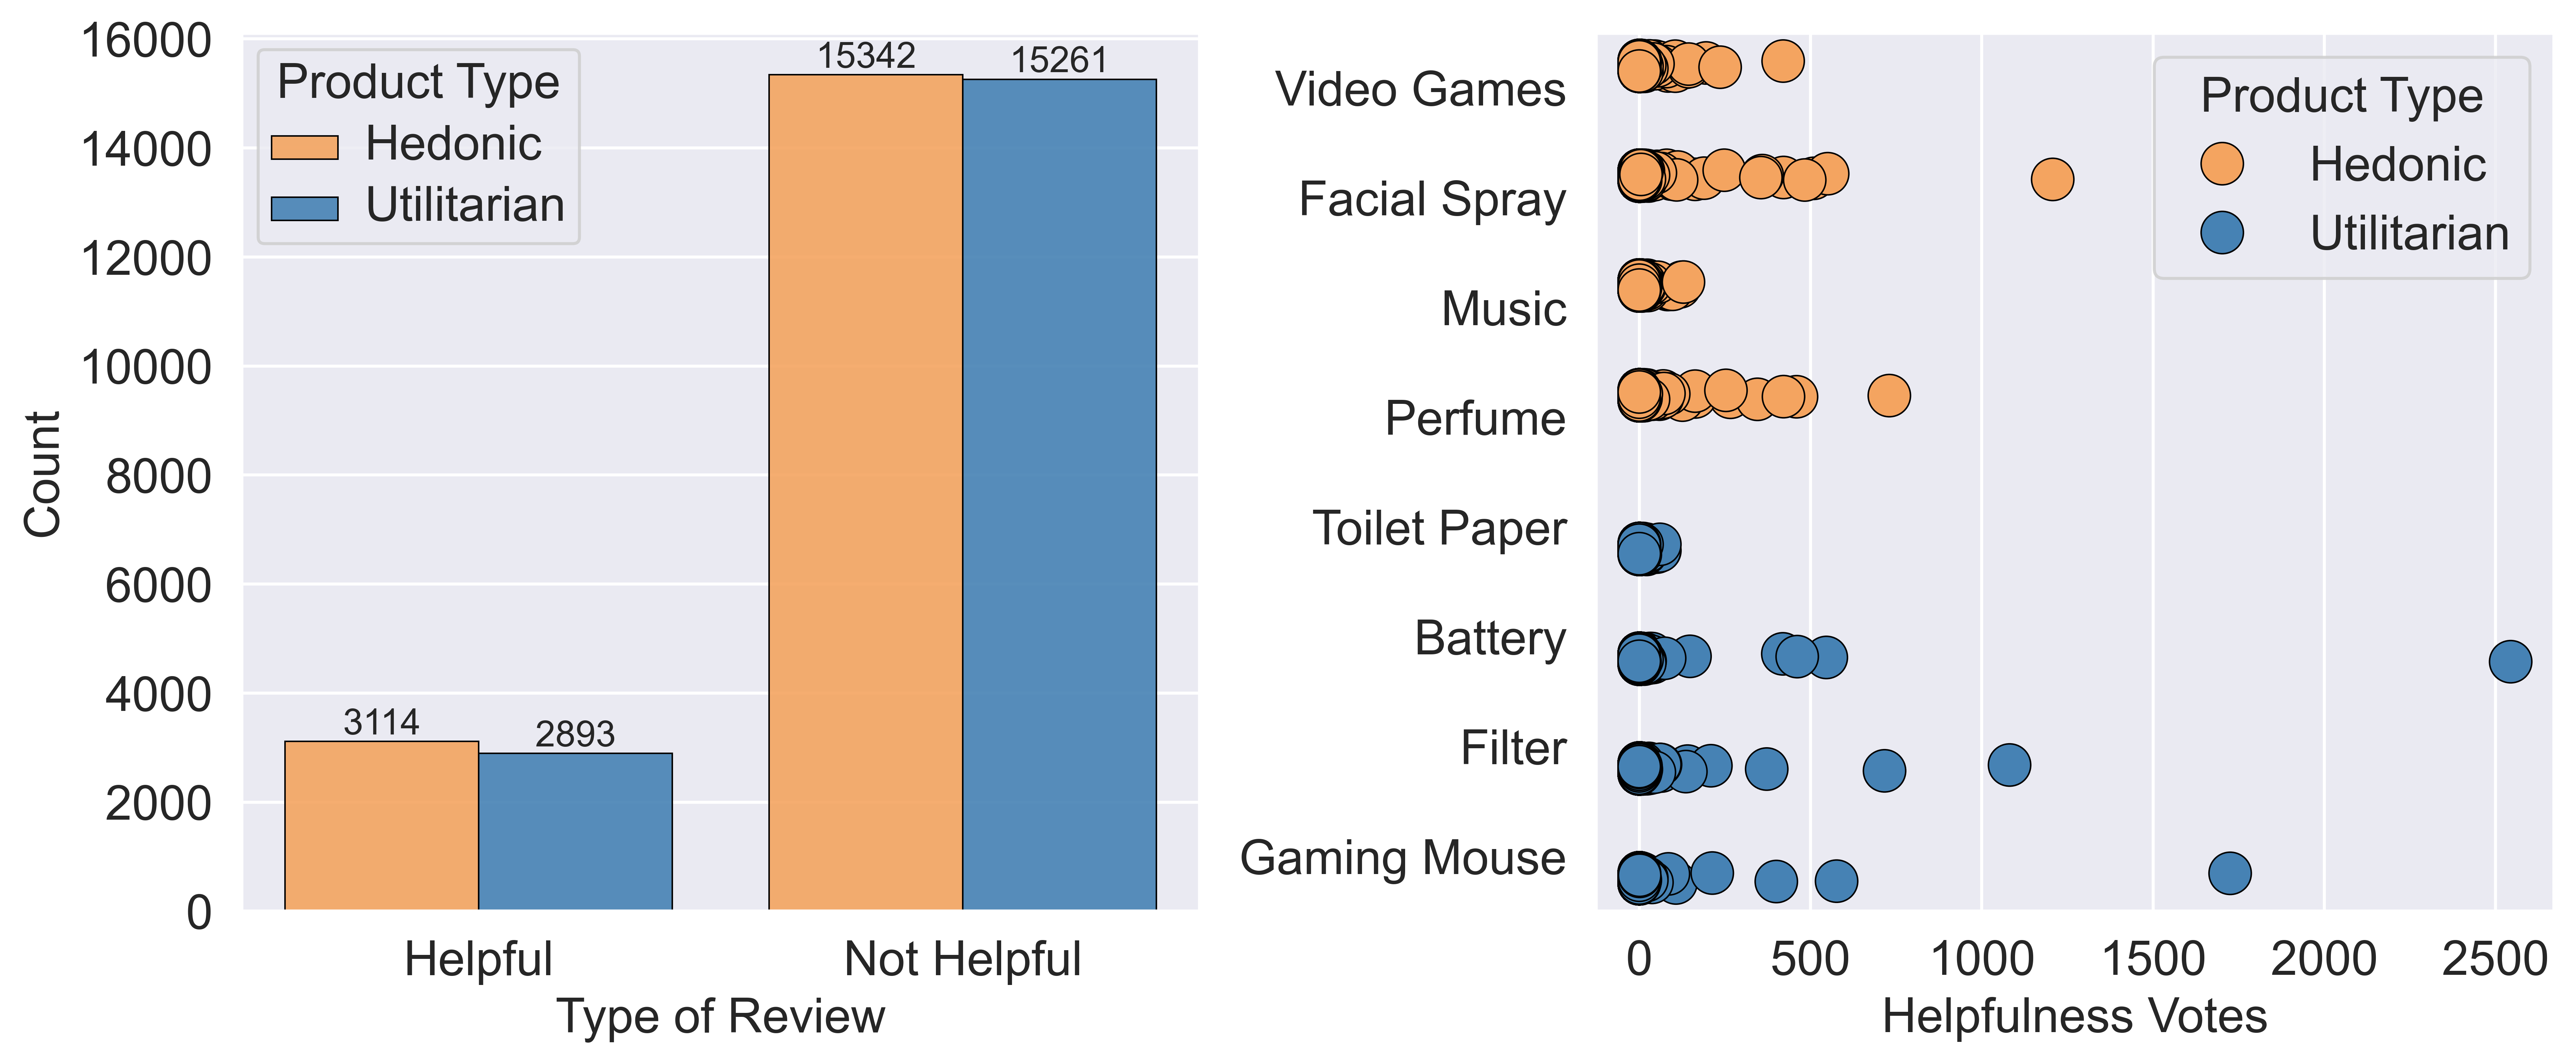

In [11]:
# Plotting distribution of helpful votes and helpful votes by product type
sns.set_theme(style='darkgrid')

# Creating helpful code for the data for that filterning the helpful votes
data['Helpful_Code'] = (data['helpful_vote'] > 0).astype(int)
data['Helpful_Code'] = data['Helpful_Code'].map({1: 'Helpful', 0: 'Not Helpful'})

# Create subplots without shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=600)

# Plot 1: Histogram of "Helpful_Code" by Product Type
help_plot = sns.histplot(data=data, x='Helpful_Code', hue='Product Type', multiple='dodge', stat='count', ax=axes[0],
                         alpha=0.9, shrink=0.8, palette={'Utilitarian': 'steelblue', 'Hedonic': 'sandybrown'}, edgecolor="black",linewidth=0.5,common_norm=False)
axes[0].set_xlabel('Type of Review', fontsize=16)
axes[0].set_ylabel('Count', fontsize=16)
axes[0].tick_params(axis='both', labelsize=16)
axes[0].xaxis.grid(False)

# Calculate the counts and annotate the bars
counts = data.groupby(['Helpful_Code', 'Product Type']).size().unstack().fillna(0)
for container in help_plot.containers:
    labels = [f'{int(value.get_height()):d}' for value in container]
    help_plot.bar_label(container, labels=labels, fontsize=12, label_type='edge')

# Plot 2: Stripplot of "helpful_ratio" by Product ID and Product Type
prod_plot = sns.stripplot(x='helpful_vote', y='Prod', hue='Product Type', data=data,
                          palette={'Utilitarian': 'steelblue', 'Hedonic': 'sandybrown'},size=14, jitter=True, dodge=True, ax=axes[1], orient='h',linewidth=0.5, edgecolor='black')
axes[1].set_xlabel('Helpfulness Votes', fontsize=16)
axes[1].set_ylabel('', fontsize=16)
axes[1].tick_params(axis='both', labelsize=16)
axes[1].legend(fontsize=16, title='Product Type', title_fontsize=16)

# Adjusting Plot Style
plt.setp(help_plot.get_legend().get_texts(), fontsize='16')  # for legend text
plt.setp(help_plot.get_legend().get_title(), fontsize='16')  # for legend title

plt.setp(prod_plot.get_legend().get_texts(), fontsize='16')  # for legend text
plt.setp(prod_plot.get_legend().get_title(), fontsize='16')  # for legend title

# Adjust layout to avoid overlap and save the plot
plt.tight_layout()
plt.savefig('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Helpful_Code_Product_Type.png', dpi=600)
plt.show()

# 2. Helpfulness test with T-Test 


In [12]:
# Testing for normality of helpful votes using the Shapiro-Wilk test 
from scipy.stats import shapiro

# Example for helpful votes in the hedonic group
statistic_ratio, p_value1 = shapiro(data['helpful_ratio'])
statistic_helpfulV, p_value2 = shapiro(data['helpful_vote'])
#statistic_helpfulC, p_value3 = shapiro(data['Helpful_Code'])

print(f"Shapiro-Wilk test for normality of helpful votes: statistic = {statistic_ratio}, p-value = {p_value1}")
print(f"Shapiro-Wilk test for normality of helpful ratio: statistic = {statistic_helpfulV}, p-value = {p_value2}")
#print(f"Shapiro-Wilk test for normality of helpful Code: statistic = {statistic_helpfulC}, p-value = {p_value3}")

Shapiro-Wilk test for normality of helpful votes: statistic = 0.023725807666778564, p-value = 0.0
Shapiro-Wilk test for normality of helpful ratio: statistic = 0.018472790718078613, p-value = 0.0


/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
# Function for calculating summary statistics by group

def summary_statistic(df, groupby_column):
    numerical_columns = ['helpful_vote','Helpful_Code']

    summary_stats = df.groupby(groupby_column)[numerical_columns].agg(['mean', 'std'])

    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

    summary_stats = summary_stats.transpose()

    return summary_stats

In [14]:
#Converting helpful code to binary
data['Helpful_Code'] = (data['helpful_vote'] > 0).astype(int)

data_stats = summary_statistic(data, 'Product Type')


print(data_stats)

Product Type         Hedonic  Utilitarian
helpful_vote_mean   1.083333     0.978132
helpful_vote_std   15.983420    26.459371
Helpful_Code_mean   0.168726     0.159359
Helpful_Code_std    0.374520     0.366020


In [15]:
#data_helpful_hedonic = data_hedonic[data_hedonic['helpful_vote'] != 0]
#data_helpful_utilitarian= data_utilitarian[data_hedonic['helpful_vote'] != 0]


In [16]:
#Converting helpful code to binary
data_helpful['Helpful_Code'] = (data_helpful['helpful_vote'] > 0).astype(int)

data_stats = summary_statistic(data_helpful, 'Product Type')


print(data_stats)

Product Type         Hedonic  Utilitarian
helpful_vote_mean   6.420681     6.137919
helpful_vote_std   38.473853    66.051611
Helpful_Code_mean   1.000000     1.000000
Helpful_Code_std    0.000000     0.000000


/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_27798/730410993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_helpful['Helpful_Code'] = (data_helpful['helpful_vote'] > 0).astype(int)


In [17]:
# Function for calculating summary statistics by group

def summary_statistic(df, groupby_column):
    numerical_columns = ['helpful_vote','Helpful_Code']

    summary_stats = df.groupby(groupby_column)[numerical_columns].agg(['median', 'std'])

    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

    summary_stats = summary_stats.transpose()

    return summary_stats

data_stats_whitney = summary_statistic(data_helpful, 'Product Type')


# Mann-Whitney U test for Helpful Votes and Helpfulness Ratio for non-normal data
import pandas as pd
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for Helpful_votes
u_statistic_votes, p_value_votes = mannwhitneyu(data_hedonic['helpful_vote'], data_utilitarian['helpful_vote'])

# Perform Mann-Whitney U test for Helpfulness_Ratio
u_statistic_classification, p_value_classification = mannwhitneyu(data_hedonic['Helpful_Code'], data_utilitarian['Helpful_Code'])


# Print results
print(f"Mann-Whitney U test results for Helpful_votes: U = {u_statistic_votes}, p-value = {p_value_votes}")
print(f"Mann-Whitney U test results for Amount of Helpful Reviews: U = {u_statistic_classification}, p-value = {p_value_classification}")

print (data_stats_whitney)

Mann-Whitney U test results for Helpful_votes: U = 169168543.0, p-value = 0.011602458871853778
Mann-Whitney U test results for Amount of Helpful Reviews: U = 169094286.0, p-value = 0.015541028929657044
Product Type           Hedonic  Utilitarian
helpful_vote_median   1.000000     1.000000
helpful_vote_std     38.473853    66.051611
Helpful_Code_median   1.000000     1.000000
Helpful_Code_std      0.000000     0.000000


In [18]:
from scipy.stats import ttest_ind

# Perform t-test for Helpful_votes
t_statistic_votes, p_value_votes = ttest_ind(data_utilitarian['helpful_vote'], data_hedonic['helpful_vote'], equal_var=False, alternative='greater')

# Perform t-test for Helpfulness_Code (assuming it's a binary variable)
t_statistic_classification, p_value_classification = ttest_ind(data_utilitarian['Helpful_Code'], data_hedonic['Helpful_Code'], equal_var=False,alternative='greater')

# Print results
print(f"One-Sided t-test results for Helpful_votes: t-statistic = {t_statistic_votes}, p-value = {p_value_votes}")
print(f"One-Sided t-test results for Amount of Helpful Reviews (Helpful_Code): t-statistic = {t_statistic_classification}, p-value = {p_value_classification}")


One-Sided t-test results for Helpful_votes: t-statistic = -0.4595476349866331, p-value = 0.6770778446344825
One-Sided t-test results for Amount of Helpful Reviews (Helpful_Code): t-statistic = -2.420138819714113, p-value = 0.9922402905102387


In [19]:
from scipy.stats import ttest_ind

# Perform one-sided two-sample t-test for helpful votes (assuming normality)
t_statistic_votes, p_value_votes = ttest_ind(data_utilitarian['helpful_vote'], data_hedonic['helpful_vote'], equal_var=False, alternative='two-sided')

# Perform one-sided two-sample t-test for Helpfulness_Code (assuming it's a binary variable)
t_statistic_classification, p_value_classification = ttest_ind(data_utilitarian['Helpful_Code'], data_hedonic['Helpful_Code'], equal_var=False, alternative='two-sided')

# Print results
print(f"Two-Sided t-test results for Helpful_votes: t-statistic = {t_statistic_votes}, p-value = {p_value_votes}")
print(f"Two-Sided t-test results for Amount of Helpful Reviews (Helpful_Code): t-statistic = {t_statistic_classification}, p-value = {p_value_classification}")


Two-Sided t-test results for Helpful_votes: t-statistic = -0.4595476349866331, p-value = 0.645844310731035
Two-Sided t-test results for Amount of Helpful Reviews (Helpful_Code): t-statistic = -2.420138819714113, p-value = 0.015519418979522574
